<a href="https://colab.research.google.com/github/Ziadnasser1/Machine-Learning-Training/blob/master/ClassificationWithRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries for the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Problem number 1:
**Binary classification** problem.

Giving random 5 values for Features (X) and give it the bias too. Also giving 5 random values for the labels (Y).

In [2]:
X=np.array([[1,1],[1,2],[1,3],[1,4],[1,5]])
Y=np.array([1,1,-1,-1,-1])
print(X.shape,X)
print(Y.shape,Y)

(5, 2) [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]
(5,) [ 1  1 -1 -1 -1]


Using **MSSE** for getting the values of the parameter "W".Also proofing the weights calculated by calculating predicted Y.

In [3]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
print(w)
yp = np.where(np.dot(X, w) >= 0, 1, -1)
print(yp)

[ 1.6 -0.6]
[ 1  1 -1 -1 -1]


Generating some random noise to add on the features.

In [4]:
noise = np.random.normal(0, 1, size=(X.shape[0],X.shape[1]))
XNoise = X + noise
print(XNoise)

[[ 1.51627527  0.76218393]
 [-0.73029443  1.99709675]
 [-0.51791962  2.96979321]
 [ 3.64476185  4.62233776]
 [ 1.91505751  5.47127446]]


Calculating the "Weights" again but now for the noisy features. And proof the y predicted.

In [5]:
w_noise = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), Y)
print(w_noise)
yp_noise = np.where(np.dot(XNoise, w_noise) >=0, 1, -1)
print(yp_noise)

[ 1.6 -0.6]
[ 1 -1 -1  1 -1]


Plotting the two functions to differentiate between normal and noisy.

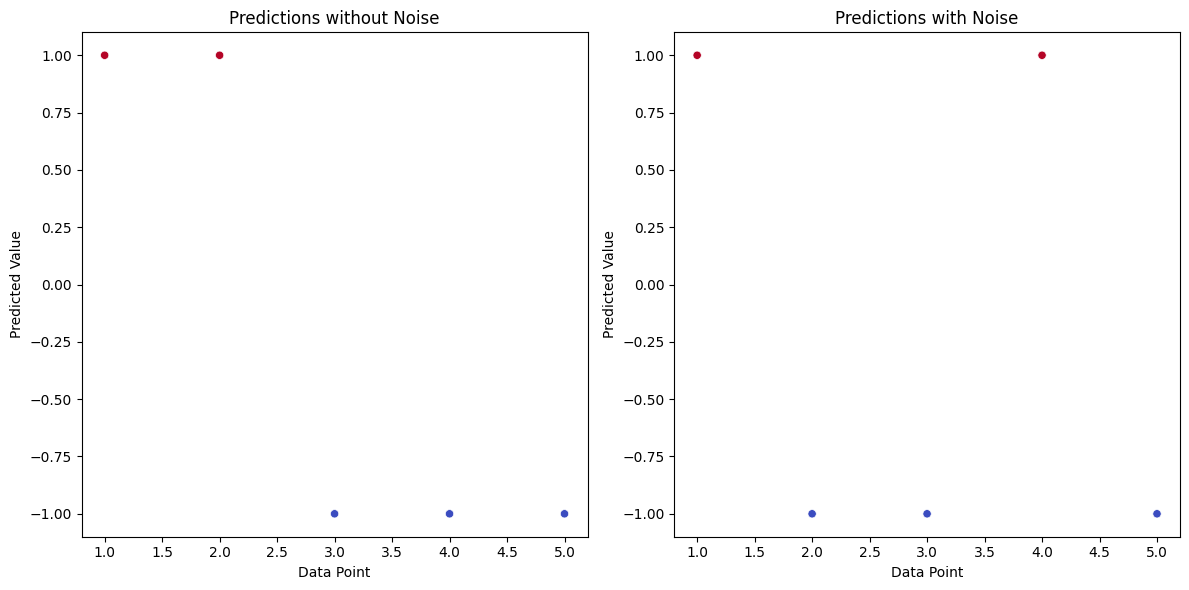

In [6]:
df_without_noise = pd.DataFrame({'Data Point': range(1, len(X)+1), 'Predicted Value': yp})
df_with_noise = pd.DataFrame({'Data Point': range(1, len(X)+1), 'Predicted Value': yp_noise})

plt.figure(figsize=(12, 6))

# Plot without noise
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_without_noise, x='Data Point', y='Predicted Value', hue='Predicted Value', palette='coolwarm', legend=False)
plt.title('Predictions without Noise')
plt.xlabel('Data Point')
plt.ylabel('Predicted Value')

# Plot with noise
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_with_noise, x='Data Point', y='Predicted Value', hue='Predicted Value', palette='coolwarm', legend=False)
plt.title('Predictions with Noise')
plt.xlabel('Data Point')
plt.ylabel('Predicted Value')

plt.tight_layout()
plt.show()

# Problem number 2:
  Classification problem with iris dataset.

In [8]:
irisDataPath ="/content/Iris.csv"

column_names = ['id','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(irisDataPath, header=None, names=column_names, skiprows = 1)
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dummiesDict={
    'Iris-setosa':1,
    'Iris-versicolor':-1,
    'Iris-virginica':-1
}

df['class'] = df['class'].map(dummiesDict)
irisData=df.drop(columns=['id'])

irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
#Splitting C1 to train and test 40 and 10 respectively.
C1_train = irisData[irisData['class'] == 1].sample(n=40, random_state=42)
C1_test = irisData[irisData['class'] == 1].drop(C1_train.index)

#Splitting C2 to train and test 80 and 20 respectively.
C2_train = irisData[irisData['class'] == -1].sample(n=80, random_state=42)
C2_test = irisData[irisData['class'] == -1].drop(C2_train.index)

#Concatenate the data set.
X_train = pd.concat([C1_train.drop(columns=['class']), C2_train.drop(columns=['class'])], axis=0)
y_train = pd.concat([C1_train['class'], C2_train['class']], axis=0)
X_test = pd.concat([C1_test.drop(columns=['class']), C2_test.drop(columns=['class'])], axis=0)
y_test = pd.concat([C1_test['class'], C2_test['class']], axis=0)

print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (120, 4)
y_train shape: (120,)
x_test shape: (30, 4)
y_test shape: (30,)


Train Using MSSE model.
Showing the Accuracy.

In [13]:
X = X_train.to_numpy()
Y = y_train.to_numpy()

W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
print(W)

yp = np.where(np.dot(X_test.to_numpy(), W) > 0,1,-1)

acc = np.mean(yp == y_test.to_numpy().T)
print(f"The accuracy is {acc*100}%")

[ 0.07899862  0.35712006 -0.49327059 -0.0161304 ]
The accuracy is 100.0%
